
# 1.Defining Project Objective & Data Import

The objective of this project is to evaluate credit portfolio performance using a cohort-based Vintage Analysis approach. The analysis focuses on measuring how loan accounts originating in different months deteriorate over time in terms of delinquency. By defining 90+ Days Past Due (DPD) as default, the project calculates cumulative default rates across Months-on-Book (MOB) to understand risk build-up patterns within each origination cohort.

This study aims to identify variations in credit quality across different vintages, determine which origination periods exhibited higher default behavior, and assess whether recent cohorts indicate improvement or deterioration in underwriting standards. Through structured cohort analysis and visualization, the project replicates real-world credit risk monitoring practices used by financial institutions to track portfolio stability and emerging risk trends.




**Dataset**: https://drive.google.com/drive/folders/1F1Kui06rVKw-twBiOCkY_ihecICnenMU?usp=drive_link

**Data Dictionary**

- **customer_id** - Unique identifier assigned to each customer in the dataset. A single customer can appear across multiple observation months to track loan performance over time.

- **application_date** - Date on which the customer applied for the loan. This date determines the origination cohort used in vintage analysis.

- **age** - Age of the customer at the time of loan application. Used for demographic risk segmentation and portfolio profiling.

- **gender** - Gender of the customer applying for the loan.

- **employment_status** - Employment category of the customer (e.g., salaried, self-employed, unemployed). This helps assess income stability and repayment capacity.

- **annual_income** - Total yearly income declared by the customer at the time of loan application.

- **monthly_income** - Monthly income of the customer, used for EMI affordability and debt burden analysis.

- **loan_amount** - Total loan amount sanctioned to the customer at origination.

- **interest_rate** - Interest rate charged on the loan. It directly impacts EMI calculation and total repayment obligation.

- **loan_term** - Duration of the loan in months. Defines the repayment timeline of the loan.

- **emi** - Equated Monthly Installment calculated based on loan amount, interest rate, and tenure.

- **dti** - Debt-to-Income ratio. Measures the borrower’s total debt obligations relative to income and indicates repayment stress.

- **credit_score_origination** - Customer’s credit score at the time of loan approval. Used for initial credit risk assessment.

- **revolving_utilization_origination** - Revolving credit utilization ratio at loan origination. Higher values may indicate higher credit dependency.

- **credit_inquiries_12m** - Number of credit inquiries made in the 12 months prior to loan approval. Frequent inquiries may indicate credit-seeking behavior.

- **deterioration_pattern** - Behavioral indicator showing whether the customer’s credit profile is worsening over time based on payment and credit trends.

- **default_12m** - Indicates whether the customer defaulted within the first 12 months after loan origination (1 = Yes, 0 = No).

- **vintage_year** - Year in which the loan was originated. Used to group loans into yearly cohorts for performance comparison.

- **vintage_month** - Month in which the loan was originated. Used for monthly cohort-based vintage analysis.

- **observation_month** - The specific month in which the loan’s performance is being evaluated.

- **months_on_book** - Number of months since loan origination (MOB). Used to track performance progression over time in vintage curves.

- **dpd_current** - Days Past Due in the current observation month. Used to categorize delinquency levels such as 30+, 60+, or 90+ DPD.

- **payment_made** - Indicates whether the borrower made the scheduled payment in that observation month (1 = Yes, 0 = No).

- **payment_amount** - Actual amount paid by the borrower in the observation month.

- **scheduled_emi** - EMI amount that was due for the respective observation month.

- **credit_score** - Updated credit score of the customer during the observation period.

- **credit_score_delta_3m** - Change in credit score over the last 3 months. A negative change may indicate increasing credit risk.

- **revolving_utilization** - Current revolving credit utilization ratio during the observation period.

- **revolving_util_delta_3m** - Change in revolving credit utilization over the last 3 months, indicating increasing or decreasing credit stress.

- **has_defaulted** - Indicates whether the customer has defaulted at any point during the observation timeline.

- **will_default_original** - Target variable indicating whether the customer was originally predicted or tagged as likely to default at origination.


# 2. Data Preparation



## 2.1 Importing Required Libraries

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


## 2.2 Loading the Dataset

In [23]:
df=pd.read_csv("origination_data-2.csv")
df2=pd.read_csv("monthly_performance-2.csv")
final_df=df.merge(df2,on="customer_id",how="inner")
final_df.head()

,customer_id,application_date,age,gender,employment_status,annual_income,monthly_income,loan_amount,interest_rate,loan_term,...,dpd_current,payment_made,payment_amount,scheduled_emi,credit_score,credit_score_delta_3m,revolving_utilization,revolving_util_delta_3m,has_defaulted,will_default_original
0,CUST100000,08-04-2022,42,Male,Self-Employed,83834,6986.17,50000,12.33,36,...,0,1,1668.61,1668.61,722,2,0.443,0.010,0.0,0.0
1,CUST100000,08-04-2022,42,Male,Self-Employed,83834,6986.17,50000,12.33,36,...,0,1,1668.61,1668.61,720,0,0.435,0.002,0.0,0.0
2,CUST100000,08-04-2022,42,Male,Self-Employed,83834,6986.17,50000,12.33,36,...,0,1,1668.61,1668.61,718,-2,0.417,-0.016,0.0,0.0
3,CUST100000,08-04-2022,42,Male,Self-Employed,83834,6986.17,50000,12.33,36,...,0,1,1668.61,1668.61,720,6,0.421,0.013,0.0,0.0
4,CUST100000,08-04-2022,42,Male,Self-Employed,83834,6986.17,50000,12.33,36,...,0,1,1668.61,1668.61,721,3,0.427,0.020,0.0,0.0



## 2.3 Initial Data Inspection

In [24]:
final_df.columns

Index(['customer_id', 'application_date', 'age', 'gender', 'employment_status',
       'annual_income', 'monthly_income', 'loan_amount', 'interest_rate',
       'loan_term', 'emi', 'dti', 'credit_score_origination',
       'revolving_utilization_origination', 'credit_inquiries_12m',
       'deterioration_pattern', 'default_12m', 'vintage_year', 'vintage_month',
       'observation_month', 'months_on_book', 'dpd_current', 'payment_made',
       'payment_amount', 'scheduled_emi', 'credit_score',
       'credit_score_delta_3m', 'revolving_utilization',
       'revolving_util_delta_3m', 'has_defaulted', 'will_default_original'],
      dtype='object')


## 2.4 Data Cleaning and Column Selection

In [25]:
final_df=final_df.drop(["age","gender","employment_status","monthly_income","credit_score_origination",
               "revolving_utilization_origination","default_12m","deterioration_pattern","credit_inquiries_12m",
              "scheduled_emi","credit_score_delta_3m","revolving_utilization","revolving_util_delta_3m","has_defaulted",
              "will_default_original"],axis=1)
final_df.head()

,customer_id,application_date,annual_income,loan_amount,interest_rate,loan_term,emi,dti,vintage_year,vintage_month,observation_month,months_on_book,dpd_current,payment_made,payment_amount,credit_score
0,CUST100000,08-04-2022,83834,50000,12.33,36,1668.61,0.35,2022,2022-04,2022-05,1,0,1,1668.61,722
1,CUST100000,08-04-2022,83834,50000,12.33,36,1668.61,0.35,2022,2022-04,2022-06,2,0,1,1668.61,720
2,CUST100000,08-04-2022,83834,50000,12.33,36,1668.61,0.35,2022,2022-04,2022-07,3,0,1,1668.61,718
3,CUST100000,08-04-2022,83834,50000,12.33,36,1668.61,0.35,2022,2022-04,2022-08,4,0,1,1668.61,720
4,CUST100000,08-04-2022,83834,50000,12.33,36,1668.61,0.35,2022,2022-04,2022-09,5,0,1,1668.61,721


In [26]:
final_df.columns

Index(['customer_id', 'application_date', 'annual_income', 'loan_amount',
       'interest_rate', 'loan_term', 'emi', 'dti', 'vintage_year',
       'vintage_month', 'observation_month', 'months_on_book', 'dpd_current',
       'payment_made', 'payment_amount', 'credit_score'],
      dtype='object')

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633965 entries, 0 to 633964
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        633965 non-null  object 
 1   application_date   633965 non-null  object 
 2   annual_income      633965 non-null  int64  
 3   loan_amount        633965 non-null  int64  
 4   interest_rate      633965 non-null  float64
 5   loan_term          633965 non-null  int64  
 6   emi                633965 non-null  float64
 7   dti                633965 non-null  float64
 8   vintage_year       633965 non-null  int64  
 9   vintage_month      633965 non-null  object 
 10  observation_month  633965 non-null  object 
 11  months_on_book     633965 non-null  int64  
 12  dpd_current        633965 non-null  int64  
 13  payment_made       633965 non-null  int64  
 14  payment_amount     633965 non-null  float64
 15  credit_score       633965 non-null  int64  
dtypes:


# 3. Feature Engineering



## 3.1 Numbers of unique customers with 90+ DPD per month


In [28]:
count_dpd90_month=(final_df[final_df["dpd_current"]==90]
                   .groupby("vintage_month")["customer_id"]
                   .nunique()
                  )
count_dpd90_month

vintage_month
2022-01    69
2022-02    65
2022-03    72
2022-04    77
2022-05    89
2022-06    67
2022-07    72
2022-08    81
2022-09    84
2022-10    81
2022-11    75
2022-12    77
2023-01    87
2023-02    69
2023-03    73
2023-04    97
2023-05    84
2023-06    76
2023-07    89
2023-08    81
2023-09    67
2023-10    78
2023-11    96
2023-12    81
2024-01    72
2024-02    48
2024-03    58
2024-04    34
2024-05    18
2024-06     9
Name: customer_id, dtype: int64


## 3.2 Identifying first 90+ DPD Customers by Vintage Month

In [29]:
c=(final_df[final_df["dpd_current"]==90]
   .sort_values("months_on_book")
   .groupby(["customer_id","vintage_month"] ,as_index=False)
   .first()
 [["customer_id","vintage_month","months_on_book"]]
)
c=c.rename(columns={"months_on_book":"first_default_mob"})



## 3.3 Count New Defaulters by MOB

In [30]:
mob_default_count=c.groupby(["vintage_month","first_default_mob"])["customer_id"].nunique()
mob_default_count

vintage_month  first_default_mob
2022-01        6                     8
               7                    14
               8                     4
               9                    11
               10                    8
                                    ..
2024-04        7                    11
               8                     8
2024-05        6                     8
               7                    10
2024-06        6                     9
Name: customer_id, Length: 189, dtype: int64


# 4.Vintage Analysis


## 4.1 Cumulative Default Calculation

In [31]:
cum_default=mob_default_count.groupby("vintage_month").cumsum()
cum_default

vintage_month  first_default_mob
2022-01        6                     8
               7                    22
               8                    26
               9                    37
               10                   45
                                    ..
2024-04        7                    26
               8                    34
2024-05        6                     8
               7                    18
2024-06        6                     9
Name: customer_id, Length: 189, dtype: int64


## 4.2 Calculating Total Customers per Vintage

In [32]:
vintage_total_cust=final_df.groupby("vintage_month")["customer_id"].nunique()
vintage_total_cust

vintage_month
2022-01    1031
2022-02     927
2022-03     999
2022-04     996
2022-05    1020
2022-06    1024
2022-07    1012
2022-08    1047
2022-09    1019
2022-10    1025
2022-11     997
2022-12    1035
2023-01    1036
2023-02     864
2023-03    1019
2023-04    1044
2023-05     985
2023-06     957
2023-07    1088
2023-08    1027
2023-09     966
2023-10    1027
2023-11    1005
2023-12    1060
2024-01    1003
2024-02     958
2024-03    1045
2024-04     998
2024-05    1066
2024-06     920
2024-07    1005
2024-08    1017
2024-09     922
2024-10    1055
2024-11    1007
Name: customer_id, dtype: int64


## 4.3 Computing Vintage Default Rate

In [33]:
vintage_default_rate=(cum_default/vintage_total_cust)*100
vintage_default_rate

vintage_month  first_default_mob
2022-01        6                    0.775946
               7                    2.133851
               8                    2.521823
               9                    3.588749
               10                   4.364694
                                      ...   
2024-04        7                    2.605210
               8                    3.406814
2024-05        6                    0.750469
               7                    1.688555
2024-06        6                    0.978261
Name: customer_id, Length: 189, dtype: float64

In [34]:
df_plot = vintage_default_rate.reset_index()
df_plot.head()

,vintage_month,first_default_mob,customer_id
0,2022-01,6,0.775946
1,2022-01,7,2.133851
2,2022-01,8,2.521823
3,2022-01,9,3.588749
4,2022-01,10,4.364694



## 4.4 Creating Vintage Pivot Table

In [35]:
df_plot=df_plot.rename(columns={"customer_id":"vintage_default_rate"})
df_plot.columns
vintage_table=df_plot.pivot( index="vintage_month",
                            columns="first_default_mob",
                            values="vintage_default_rate"
)
vintage_table.round(2)    

first_default_mob,6,7,8,9,10,11,12
vintage_month,,,,,,,
2022-01,0.78,2.13,2.52,3.59,4.36,5.53,6.69
2022-02,1.29,2.16,3.45,4.42,5.39,6.26,7.01
2022-03,0.60,1.60,3.20,4.40,5.41,6.41,7.21
2022-04,0.80,1.81,2.61,3.61,4.72,6.33,7.73
2022-05,1.08,2.25,3.53,4.61,5.78,7.25,8.73
2022-06,0.98,1.66,2.93,3.91,4.88,5.86,6.54
2022-07,1.38,2.27,3.06,3.75,4.74,6.03,7.11
2022-08,0.48,1.53,2.87,3.72,4.78,6.11,7.74
2022-09,0.88,1.86,2.75,3.83,4.81,6.77,8.24



## 4.5 Visualization of Vintage Curves

<Figure size 800x500 with 0 Axes>

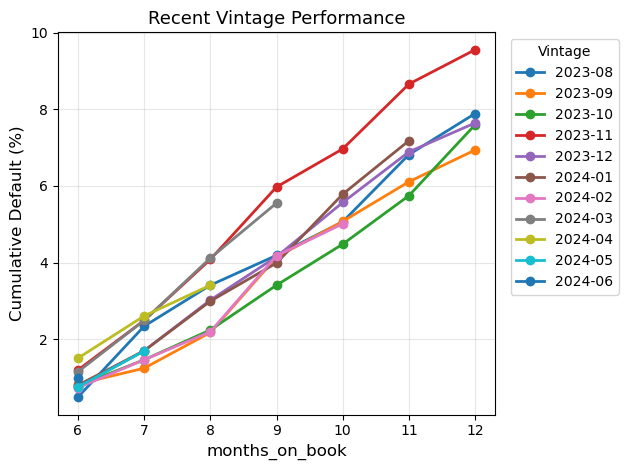

vintage_month,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06
first_default_mob,,,,,,,,,,,
6,0.486855,0.828157,0.778968,1.194030,0.754717,0.797607,0.730689,1.148325,1.503006,0.750469,0.978261
7,2.336904,1.242236,1.460565,2.487562,1.698113,1.694915,1.461378,2.488038,2.605210,1.688555,NaN
8,3.407984,2.173913,2.239533,4.079602,3.018868,2.991027,2.192067,4.114833,3.406814,NaN,NaN
9,4.186952,4.140787,3.407984,5.970149,4.150943,3.988036,4.175365,5.550239,NaN,NaN,NaN
10,5.063291,5.072464,4.479065,6.965174,5.566038,5.782652,5.010438,NaN,NaN,NaN,NaN
11,6.815969,6.107660,5.744888,8.656716,6.886792,7.178465,NaN,NaN,NaN,NaN,NaN
12,7.887050,6.935818,7.594937,9.552239,7.641509,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
v_table=vintage_table.tail(11)
vintage_curve=v_table.T
plt.figure(figsize=(8,5))

vintage_curve.plot(linewidth=2,marker='o')

plt.xlabel("months_on_book", fontsize=12)
plt.ylabel("Cumulative Default (%)", fontsize=12)
plt.title("Recent Vintage Performance", fontsize=13)

plt.grid(alpha=0.3)
plt.legend(title="Vintage", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()
vintage_curve 

#### Analysis of Recent Loan Cohort Performance
The graph illustrates the cumulative default percentage (90+ DPD) across Months on Book (MOB) for the most recent eleven vintages, spanning from August 2023 to June 2024. The analysis focuses specifically on these recent cohorts to ensure that the findings reflect current underwriting standards, portfolio strategy, and prevailing economic conditions. Older vintages were excluded to avoid distortion from outdated credit policies or structural changes in lending practices.

Across all cohorts, cumulative defaults increase steadily as loan age progresses, reflecting the normal seasoning effect observed in credit portfolios. However, the November 2023 vintage shows a relatively steeper rise in default rates, reaching the highest cumulative level by Month 12, indicating comparatively higher credit risk during that origination period.


## 4.6 Identifying Worst Performing Vintage per Year

In [37]:
df_plot["vintage_month"]=pd.to_datetime(df_plot["vintage_month"])
df_plot["vintage_year"]=df_plot["vintage_month"].dt.year
max_default=df_plot.groupby("vintage_year")["vintage_default_rate"].max().reset_index()
max_default.merge(df_plot,on=["vintage_year","vintage_default_rate"],how="inner")

,vintage_year,vintage_default_rate,vintage_month,first_default_mob
0,2022,8.725490,2022-05-01,12
1,2023,9.552239,2023-11-01,12
2,2024,7.178465,2024-01-01,11


## Visualizing Peak Default Rate by Vintage Year

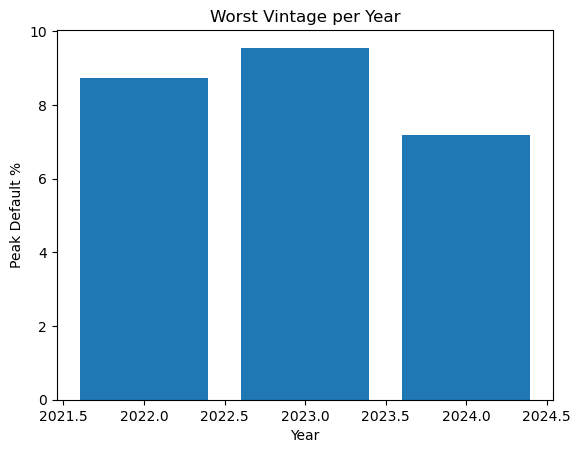

In [38]:
plt.bar(max_default["vintage_year"],
        max_default["vintage_default_rate"])

plt.xlabel("Year")
plt.ylabel("Peak Default %")
plt.title("Worst Vintage per Year")
plt.show()

### Why this Bar Chart & How it helps in Decision Making
The bar chart displays the highest cumulative default rate recorded within each year by identifying the worst-performing vintage for that specific year. Each bar represents the peak default percentage observed among all origination cohorts within that calendar year.

This visualization enables a clear comparison of credit risk intensity across different years. A higher bar indicates greater portfolio stress during that period, while a lower bar suggests comparatively stronger credit performance.

From a corporate risk management perspective, this analysis supports strategic decision-making by highlighting years with elevated credit deterioration. It allows management to evaluate the impact of underwriting policies, assess external economic influences, and adjust risk appetite accordingly. By identifying periods of heightened vulnerability, organizations can proactively refine credit approval criteria, pricing strategies, and portfolio monitoring frameworks to strengthen overall risk control.


# 5.Conclusion

The vintage analysis provides a structured cohort-based evaluation of loan performance by tracking cumulative defaults over time. The results indicate that while most recent vintages demonstrate gradual and controlled risk buildup, certain cohorts exhibit comparatively higher default accumulation, highlighting variations in credit quality across origination periods.

The year-wise peak default assessment further reveals fluctuations in portfolio stress across different years, enabling identification of periods with elevated credit risk.

Overall, the analysis offers valuable insights into portfolio stability, underwriting effectiveness, and emerging risk trends. It serves as a practical tool for ongoing credit monitoring and supports informed decision-making in corporate risk management.